
#**Fantasy Football Points Prediction Report**
## **Introduction**
Fantasy football is a popular online game where participants assemble imaginary teams of real players competing in professional football leagues. Points are awarded based on the actual statistical performance of the players in the real-world games. In this report, we aim to predict the fantasy football points per game (PPG) for players using machine learning models. Our intent is to take player statistics from year X and make a model for their PPG for year X+1. Thus giving us an idea who we may want to draft to our teams in the upcoming season.

##**Dataset Description**
Stats are courtesy of [Pro Football Reference](https://www.pro-football-reference.com/)

The dataset consists of player statistics and corresponding fantasy points for multiple seasons.

**Player Statistics:** Contains various performance metrics for each player, including but not limited to:
* Passing attempts
* Passing completions
* Passing yards
* Passing touchdowns
* Rushing yards
* Rushing touchdowns
* Receiving yards
* Receiving touchdowns

**Fantasy Points:** Includes the fantasy points per game (PPG) for each player.

##**Team Responsibilities**
* **John Mikolajczyk:** John took on the main role in collecting data and drafting the report. He assembled and cleaned the dataset containing player statistics from multiple NFL seasons and also spearheaded the report's composition. John also contributed to brainstorming ideas for regression analysis and assisted Henry in model creation.
* **Henry Gates:** Henry led the model creation and optimization efforts. He explored various algorithms and conducted hyperparameter optimization to enhance model performance. Henry also developed the code for displaying graphs and helped compose and proofread the write-up.

#**Data Preprocessing**
**Data Loading:** We loaded player statistics and fantasy points datasets for multiple seasons and merged them based on player names.

**Feature Scaling:** We standardized numerical features using the StandardScaler to ensure that all features have a mean of 0 and a standard deviation of 1.

**Train-Test Split:** We split the dataset into training and testing sets with a 80-20 split ratio.

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


In [47]:

PlayerStats21  = "training_set/2021/2021_player_stats.csv"
PlayerPoints21 = "training_set/2021/2022_player_points.csv"
PlayerStats20  = "training_set/2020/2020_player_stats.csv"
PlayerPoints20 = "training_set/2020/2021_player_points.csv"
PlayerStats19  = "training_set/2019/2021_player_stats.csv"
PlayerPoints19 = "training_set/2019/2019_player_stats.csv"

#Loading in Data with pandas
stats21 = pd.read_csv(PlayerStats21)
points21 = pd.read_csv(PlayerPoints21)
stats20 = pd.read_csv(PlayerStats21)
points20 = pd.read_csv(PlayerPoints21)
stats19 = pd.read_csv(PlayerStats21)
points19 = pd.read_csv(PlayerPoints21)
combined_stats = pd.concat([stats21, stats20, stats19])
combined_points = pd.concat([points21, points20, points19])



In [48]:
#Setting Min max Scaler transformation as way of regularization/standardization
numerical_features = [ 'G', 'GS', 'Cmp', 'Att', 'Yds', 'TD', 'Int', 'Att.1', 'Yds.1', 'Tgt', 'Rec', 'Yds.2', 'Y/R', 'TD.2', 'Fmb', 'FL', 'TD.3', '2PM', '2PP']
scaler = StandardScaler()
combined_stats[numerical_features] = scaler.fit_transform(combined_stats[numerical_features])

#Merging features and labels on player name
merged_df = pd.merge(combined_stats, combined_points, on='PLAYER')
merged_df.dropna(inplace=True)


#Dropping Names, Age, and ppg from features for training purposes
X = merged_df.drop(['PLAYER', 'PPG', 'Age'], axis=1)
y = merged_df['PPG']

#train test split creation and validation split for data separation purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val , y_train, y_val = train_test_split(X_train, y_train, test_size=.3, random_state=42)



#**Model Building and Evaluation**
##We experimented with several models:

**Random Forest Regressor:** We first trained a baseline Random Forest Regressor and then optimized its hyperparameters using GridSearchCV.

**XGBoost Regressor:** Similarly, we trained a baseline XGBoost Regressor and optimized its hyperparameters using GridSearchCV.

**Ridge Regression:** We also applied Ridge Regression and optimized its regularization strength using GridSearchCV.

We evaluated each model using Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and cross-validated RMSE.

Results:
MAE: 0.06008595051117497
MSE: 0.17239460892936911
RMSE: 0.4152042978214088
Cross-validated RMSE: 0.4157470733319409


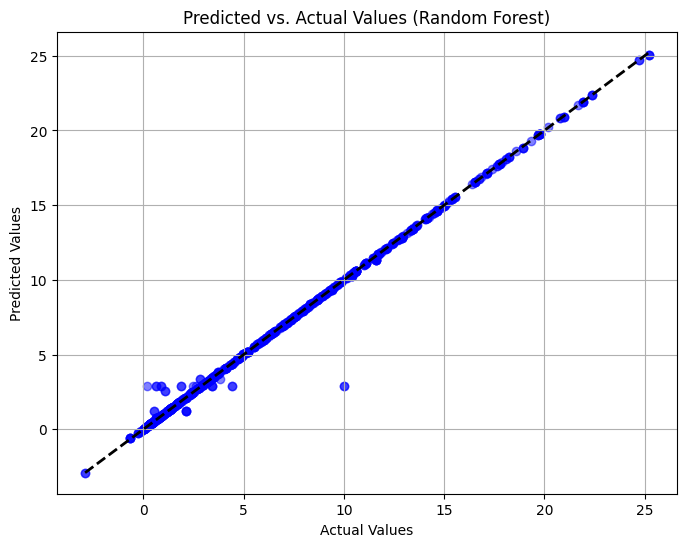

In [49]:
#Creating Baseline Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)

#Running Predictions and finding Error
y_pred = rf_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Results:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Cross-validation
cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {cv_rmse_scores.mean()}')

#Plotting relative error accuracy
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Random Forest)')
plt.grid(True)
plt.show()


In [50]:

#Finding best Params for Random Forest
rf_param_grid = {
    "n_estimators" : [10,20,30],
    "max_features" : ["sqrt", "log2"],
    "min_samples_split" : [2,4,8],
    "bootstrap": [True, False]
    }

gwiddy = GridSearchCV(rf_regressor,param_grid=rf_param_grid, cv = 5)

gwiddy.fit(X_train, y_train)
print('Best Parameters:',gwiddy.best_params_)



Best Parameters: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 10}


Results:
MAE: 0.050242444113090784
MSE: 0.17130633053874458
RMSE: 0.4138916893811044
Cross-validated RMSE: 0.397726111171519


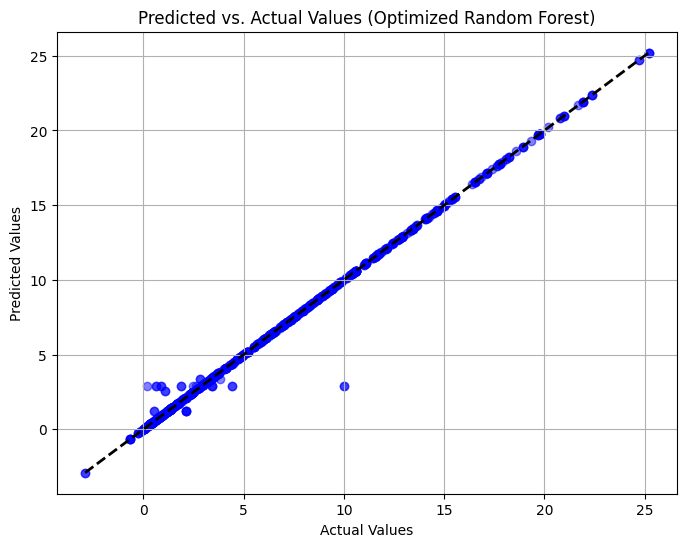

In [51]:
#Creating Better Random Forest Regressor
better_rf = RandomForestRegressor(bootstrap=False, max_features='log2', min_samples_split=4, n_estimators=10)

#Running Predictions and finding Error
better_rf.fit(X_train, y_train)
y_pred = better_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Results:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


# Cross-validation
cv_scores = cross_val_score(better_rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {cv_rmse_scores.mean()}')


#Plotting relative error accuracy
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Optimized Random Forest)')
plt.grid(True)
plt.show()




Results:
MAE: 0.0740038378309278
MSE: 0.172681113401794
RMSE: 0.4155491708592306
Cross-validated RMSE: 0.4038531565364904


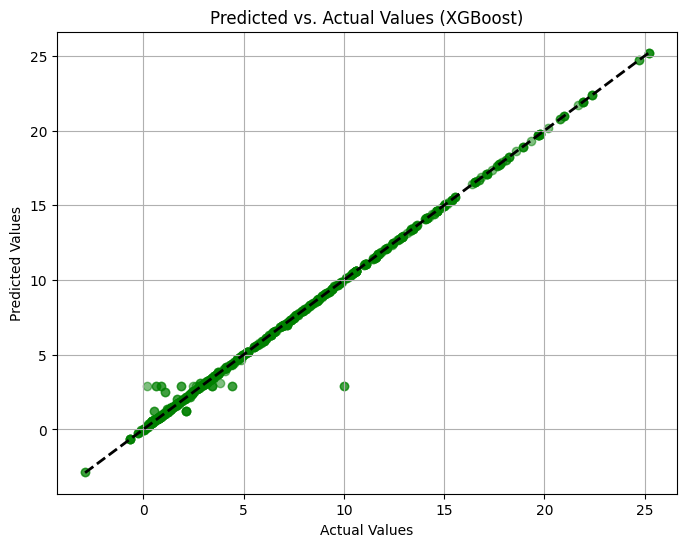

In [52]:
#Creating baseline XGB regressor
xgb_regressor = xgb.XGBRegressor()


#Running Predictions and finding Error
xgb_regressor.fit(X_train, y_train)
y_pred_xgb = xgb_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
print('Results:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')



# Cross-validation
cv_scores = cross_val_score(xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {cv_rmse_scores.mean()}')


#Plotting relative error accuracy
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (XGBoost)')
plt.grid(True)
plt.show()

In [53]:

xgb_param = xgb.XGBRegressor()

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2]
}
gwiddy = GridSearchCV(xgb_param,param_grid=xgb_param_grid, cv = 5)

gwiddy.fit(X_train, y_train)
print('Best Parameters:',gwiddy.best_params_)



Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}


Results:
MAE: 0.050741985519551995
MSE: 0.17129738178684772
RMSE: 0.4138808787403058
Cross-validated RMSE: 0.3977455791608464


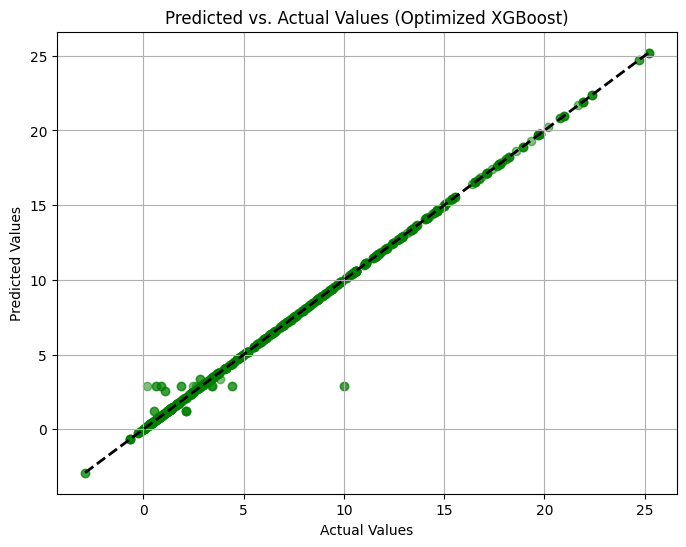

In [54]:



better_xgb = xgb.XGBRegressor(learning_rate=.2, max_depth = 7, n_estimators = 300)

better_xgb.fit(X_train, y_train)
y_pred_xgb = better_xgb.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
rmse = np.sqrt(mse)
print('Results:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

cv_scores = cross_val_score(better_xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print(f'Cross-validated RMSE: {cv_rmse_scores.mean()}')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_xgb, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Optimized XGBoost)')
plt.grid(True)
plt.show()

Results:
MAE: 2.5705947540082645
MSE: 11.199352540115637
RMSE: 3.3465433719161086


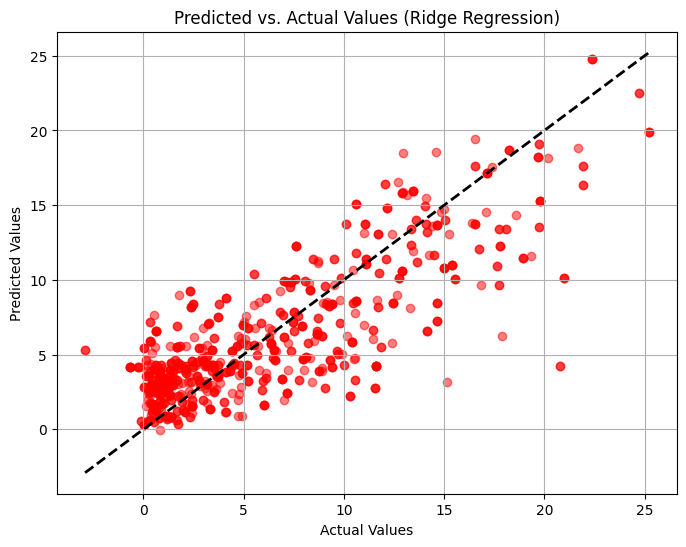

In [55]:

# Creating Ridge Model
ridge_regressor = Ridge()
ridge_regressor.fit(X_train, y_train)

# Getting Ridge Predictions
y_pred_ridge = ridge_regressor.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
print('Results:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Plotting predicted vs. actual values for Ridge regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Ridge Regression)')
plt.grid(True)
plt.show()



In [56]:

Ridge_param = Ridge()

param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0],  # Regularization strength
}
gwiddy = GridSearchCV(Ridge_param,param_grid= param_grid, cv = 5)

gwiddy.fit(X_train, y_train)
print('Best Parameters:',gwiddy.best_params_)



Best Parameters: {'alpha': 0.1}


Results:
MAE: 2.568481636773248
MSE: 11.190762813157962
RMSE: 3.3452597527184587


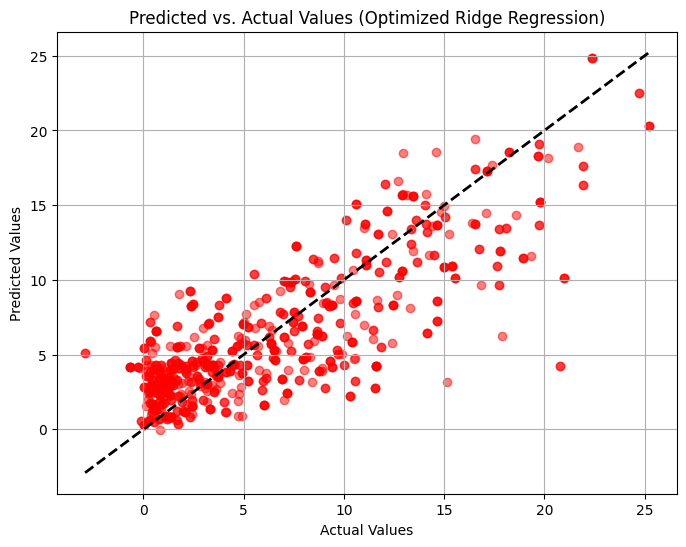

In [57]:
# Creating Ridge Model
better_ridge_regressor = Ridge(alpha=.01)
better_ridge_regressor.fit(X_train, y_train)

# Getting Ridge Predictions
y_pred_ridge = better_ridge_regressor.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
mse = mean_squared_error(y_test, y_pred_ridge)
rmse = np.sqrt(mse)
print('Results:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Plotting predicted vs. actual values for Ridge regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='red', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Optimized Ridge Regression)')
plt.grid(True)
plt.show()

Results:
MAE: 2.9210367728009468
MSE: 16.56009139971386
RMSE: 4.069409219986834


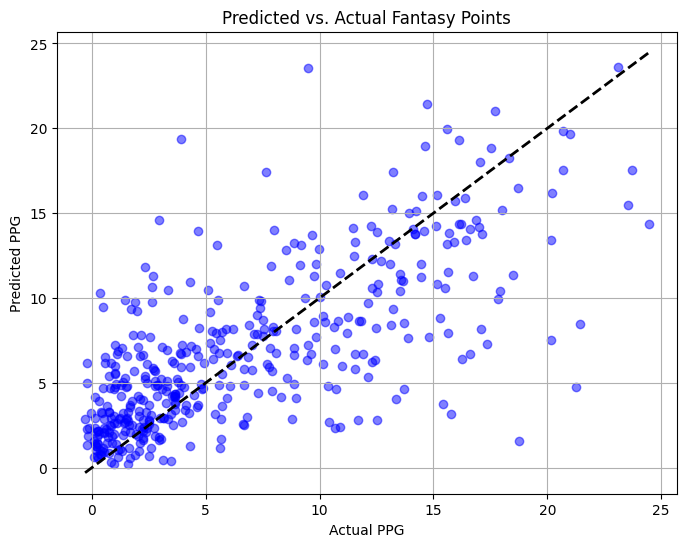

In [58]:
test_players_stats = "test_set/2022_player_stats.csv"
test_players_labels = "test_set/2023_player_points.csv"
stats22 = pd.read_csv(test_players_stats)
points22 = pd.read_csv(test_players_labels)
stats22[numerical_features] = scaler.fit_transform(stats22[numerical_features])




test_merged_df = pd.merge(stats22, points22, on='PLAYER')
test_merged_df.dropna(inplace=True)


#Dropping Names, Age, and ppg from features for training purposes
X = test_merged_df.drop(['PLAYER', 'PPG', 'Age'], axis=1)
y_23 = test_merged_df['PPG']

y_pred_23 = better_rf.predict(X)

mae_ridge = mean_absolute_error(y_23, y_pred_23)
mae = mean_absolute_error(y_23, y_pred_23)
mse = mean_squared_error(y_23, y_pred_23)
rmse = np.sqrt(mse)
print('Results:')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Plotting predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_23, y_pred_23, color='blue', alpha=0.5)
plt.plot([y_23.min(), y_23.max()], [y_23.min(), y_23.max()], 'k--', lw=2)
plt.xlabel('Actual PPG')
plt.ylabel('Predicted PPG')
plt.title('Predicted vs. Actual Fantasy Points')
plt.grid(True)
plt.show()

In [59]:
test_players_stats = "test_set/2022_player_stats.csv"
test_players_labels = "test_set/2023_player_points.csv"
stats22 = pd.read_csv(test_players_stats)
points22 = pd.read_csv(test_players_labels)

player_name = 'Josh Allen'
stat_column = 'PPG'

stat_value = points22.loc[points22['PLAYER'] == player_name, stat_column].values[0]
pookiePoints = points22[points22['PLAYER'] == 'Josh Allen']
pookiePoints = pookiePoints.drop(["PLAYER"], axis=1)
Pookie= stats22[stats22['PLAYER'] == 'Josh Allen']
Pookie = Pookie.drop(["PLAYER", 'Age'], axis=1)
y_pred = better_rf.predict(Pookie)
print(f"Player: {player_name}")
print(f"Predicted: {y_pred}")
print(f"Actual: [{stat_value}]")



Player: Josh Allen
Predicted: [22.1580098]
Actual: [23.094117647058823]


#**Conclusion:**

#**Results**

Our results indicated that both the optimized Random Forest Regressor and XGBoost Regressor outperformed the baseline Ridge Regression model in terms of mean absolute error, mean squared error, and root mean squared error. Furthermore, the optimized XGBoost Regressor demonstrated slightly better performance compared to the optimized Random Forest Regressor. The superior performance of XGBoost over both Random Forest and Ridge Regression suggests that our dataset likely contains complex, non-linear relationships between NFL player statistics and future fantasy football stats.

#**Interactive Player Prediction:**

To allow users to predict the fantasy points of their favorite NFL players using our model, we've added the option to change the player name in the last code cell. Simply replace all instances of 'Josh Allen' in the final cell with the name of the desired player, and run the cell to see how our model predicts their performance. You will need to acquire the CSV files we used in order to do so.

#**Limitations**

**Some limitations for our model include:**
* **Seasonal Variability:** NFL player performance can vary significantly from season to season due to factors like changes in coaching staff, team strategies, player form, and overall league dynamics. Models trained on historical data might struggle to capture thse variations effectively.
* **Intra-seasonal Dynamics:** Within a single season, player performance can fluctuate due to injuries, changes in playing time, weather conditions, and opponent strength. Models trained on aggregated season-level data might overlook these dynamics, leading to suboptimal predictions.
* **Generalization to New Seasons or Conditions:** Models trained on past NFL seasons might not generalize well to future seasons with different player compositions, rule changes, or other external factors affecting gameplay.
* **Limited Scope for Rookies and New Players:** Since the models rely on historical NFL player statistics, they cannot predict performance for rookies or players who lack prior professional experience. Incorporating data from preseason performances or college statistics could help address this limitation but might introduce additional complexities and uncertainties.

#**Final Thoughts**
In this project, we aimed to predict the fantasy points per game of NFL players using machine learning regression models. We utilized a dataset consisting of player statistics and fantasy points from the 2019 to 2023 seasons to train and evaluate our models. The dataset included various features such as games played, passing yards, rushing yards, receiving yards, and many others.

We are very satisfied with the performance of our models. With these models at hand, we are ready to use this information to make predictions for the upcoming NFL season, allowing us to make more informed decisions and gain a competitive edge in fantasy football leagues.